# Introduction
##### The goal of this project is to analyze which telecome plan is bringing more revenue.
### Outlines
##### Assess the data and make decisions about handling the data
##### Perform computations, hypothesis testing and logistic regression on the data
##### Make recommendations backed by my work

In [1]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U pandas

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.4)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
data_calls = pd.read_csv('/datasets/megaline_calls.csv')
data_calls.columns.str.lower()
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls.info()
data_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


id  user_id   call_date  duration
0   1000_93     1000  2018-12-27       9.0
1  1000_145     1000  2018-12-27      14.0
2  1000_247     1000  2018-12-27      15.0
3  1000_309     1000  2018-12-28       6.0
4  1000_380     1000  2018-12-30       5.0
5  1000_388     1000  2018-12-31       3.0
6  1000_510     1000  2018-12-27       6.0
7  1000_521     1000  2018-12-28      15.0
8  1000_530     1000  2018-12-28       6.0
9  1000_544     1000  2018-12-26       5.0

The information looks meticulously gathered each time a person made a call.

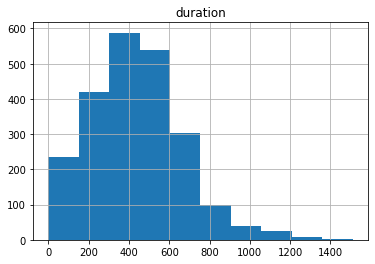

In [4]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_calls_per_user = data_calls.groupby(['user_id', 'month'])['duration'].sum()
data_calls_per_user = data_calls_per_user.to_frame()
data_calls_per_user
data_calls_per_user.hist()
plt.show()

The calls are grouped in month as required.

In [5]:
data_internet = pd.read_csv('/datasets/megaline_internet.csv')
data_internet.columns.str.lower()
data_internet.info()
data_internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92

The usage of internet is in mb and calculated per day.

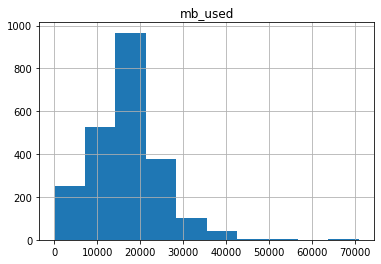

In [6]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_internet_per_user=data_internet.groupby(['user_id','month'])['mb_used'].sum()
data_internet_per_user=data_internet_per_user.to_frame()
data_internet_per_user
data_internet_per_user.hist()
plt.show()

The information is grouped by month and later on will be converted into gb.

In [7]:
data_messages = pd.read_csv('/datasets/megaline_messages.csv')
data_messages.columns.str.lower()
data_messages = data_messages.rename(columns = {'id' : 'messages'})
data_messages.info()
data_messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   messages      76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


messages  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28

The messages are simply counted each time a message is sent.

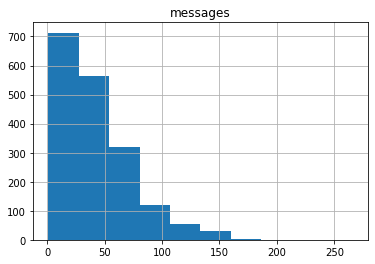

In [8]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages_per_user = data_messages.groupby(['user_id', 'month'])['messages'].count()
data_messages_per_user = data_messages_per_user.to_frame()
data_messages_per_user
data_messages_per_user.hist()
plt.show()

I counted the messages per month.

In [9]:
data_users = pd.read_csv('/datasets/megaline_users.csv')
data_users.columns.str.lower()
data_users.info()
data_users.head(10)
data_users[['user_id', 'plan']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id      plan
0       1000  ultimate
1       1001      surf
2       1002      surf
3       1003      surf
4       1004      surf
..       ...       ...
495     1495      surf
496     1496      surf
497     1497  ultimate
498     1498      surf
499     1499      surf

[500 rows x 2 columns]

The users are separated into two groups, surf (the cheaper one) and ultimate (the expensive one).

In [10]:
data_plans = pd.read_csv('/datasets/megaline_plans.csv')
data_plans.columns.str.lower()
data_plans.info()
data_plans.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

The plans explained.

In [11]:
data_internet_per_user['mb_used'] = data_internet_per_user['mb_used'].apply(np.ceil)
data_internet_per_user = data_internet_per_user.rename(columns = {'mb_used' : 'gb_used'})
data_internet_per_user['gb_used'] = (data_internet_per_user['gb_used'] / 1024).apply(np.ceil)

Converting mb into gb and rounding the numbers as requested.

In [12]:
cluster_0 = pd.merge(left = data_internet_per_user, right = data_calls_per_user,
                     how = 'outer' ,on = ['user_id', 'month']).fillna(0)
cluster_1 = pd.merge(left = cluster_0, right = data_messages_per_user,
                     how = 'outer' ,on = ['user_id', 'month']).fillna(0)
cluster_2 =  pd.merge(left = cluster_1, right = data_users[['user_id', 'plan']],
                     how = 'outer' ,on = 'user_id').fillna(0)

Merging the data.

In [13]:
cluster_2

user_id  gb_used  duration  messages      plan
0        1000      2.0     124.0      11.0  ultimate
1        1001      7.0     182.0      30.0      surf
2        1001     14.0     315.0      44.0      surf
3        1001     22.0     393.0      53.0      surf
4        1001     19.0     426.0      36.0      surf
...       ...      ...       ...       ...       ...
2298     1307      0.0       0.0       0.0      surf
2299     1319      0.0       0.0       0.0      surf
2300     1378      0.0       0.0       0.0      surf
2301     1463      0.0       0.0       0.0  ultimate
2302     1473      0.0       0.0       0.0      surf

[2303 rows x 5 columns]

In [14]:
cluster_2.isna().sum()*100/len(cluster_2)
pd.DataFrame(round((cluster_2.isna().mean()*100),2)).style.background_gradient('coolwarm')
cluster_2.isna().mean() * 100

user_id     0.0
gb_used     0.0
duration    0.0
messages    0.0
plan        0.0
dtype: float64

Checking for missing information.

In [15]:
cluster_2.drop_duplicates().reset_index()

index  user_id  gb_used  duration  messages      plan
0         0     1000      2.0     124.0      11.0  ultimate
1         1     1001      7.0     182.0      30.0      surf
2         2     1001     14.0     315.0      44.0      surf
3         3     1001     22.0     393.0      53.0      surf
4         4     1001     19.0     426.0      36.0      surf
...     ...      ...      ...       ...       ...       ...
2296   2298     1307      0.0       0.0       0.0      surf
2297   2299     1319      0.0       0.0       0.0      surf
2298   2300     1378      0.0       0.0       0.0      surf
2299   2301     1463      0.0       0.0       0.0  ultimate
2300   2302     1473      0.0       0.0       0.0      surf

[2301 rows x 6 columns]

Dropping duplicates.

In [16]:
def cost(row):
    internet = row['gb_used']
    calls = row['duration']
    messages = row['messages']
    plan = row['plan']
    if plan == 'ultimate':
        plan_cost = 70
    else:
        plan_cost = 20
    if  internet > 30 and plan == 'ultimate':
        Excess_Internet = internet % 30
        internet_cost = Excess_Internet * 7
    else:
        internet_cost = 0
    if  internet > 15 and plan == 'surf':
        Excess_Internet = internet % 15
        internet_cost = Excess_Internet * 10
    else:
        internet_cost = 0
    if  calls > 3000 and plan == 'ultimate':
        excess_calls = calls % 3000
        calls_cost = Excess_calls * 0.01
    else:
        calls_cost = 0
    if  calls > 500 and plan == 'surf':
        excess_calls = calls % 500
        calls_cost = excess_calls * 0.03
    else:
        calls_cost = 0
    if  messages > 1000 and plan == 'ultimate':
        excess_messages = messages % 1000
        messages_cost = Excess_messages * 0.01
    else:
        messages_cost = 0
    if  messages > 50 and plan == 'surf':
        excess_messages = messages % 50
        messages_cost = excess_messages * 0.03
    else:
        messages_cost = 0
    total_cost = messages_cost + calls_cost + internet_cost + plan_cost
    return total_cost

Calculating all the revenue from each user with the specified costs.

In [17]:
cluster_2['total_cost'] = cluster_2.apply(cost, axis=1)
cluster_2.groupby(['plan'])['gb_used'].unique()

plan
surf        [7.0, 14.0, 22.0, 19.0, 15.0, 27.0, 21.0, 24.0...
ultimate    [2.0, 3.0, 32.0, 17.0, 24.0, 15.0, 7.0, 21.0, ...
Name: gb_used, dtype: object

In [18]:
cluster_2.describe()

user_id      gb_used     duration     messages   total_cost
count  2303.000000  2303.000000  2303.000000  2303.000000  2303.000000
mean   1246.214937    16.797221   427.419453    33.022579    57.830734
std     143.044136     7.857946   237.490294    34.065907    31.849554
min    1000.000000     0.000000     0.000000     0.000000    20.000000
25%    1122.000000    12.000000   262.500000     3.000000    22.670000
50%    1245.000000    17.000000   424.000000    25.000000    70.000000
75%    1368.000000    21.000000   571.500000    51.000000    70.000000
max    1499.000000    70.000000  1510.000000   266.000000   168.910000

In [19]:
cluster_2.groupby(['plan'])['total_cost'].agg(['mean', 'median']).reset_index()

plan       mean  median
0      surf  52.250906    40.0
1  ultimate  70.000000    70.0

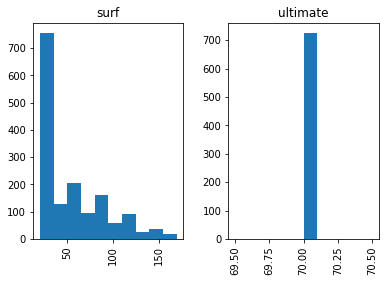

In [20]:
cluster_2.total_cost.hist(by = cluster_2['plan'], bins = 10)
plt.show()

The surf program is skewed to the right (extra cost for extra use).
There is seem to be a problem with the ultimate dispersion but I couldn't find it.

In [21]:
cluster_2.total_cost.std()

31.84955364184849

In [22]:
lj = cluster_2.total_cost.std() / cluster_2.total_cost.mean()
lj

0.5507374977807206

In [23]:
def cluster_2_stat (total_cost):
    ax = cluster_2.hist(by = cluster_2['plan'], bins = 11)
    mean = cluster_2[total_cost].mean()
    std = cluster_2[total_cost].std()
    var = cluster_2[total_cost].var()
    cv = std / mean
    plt.show()
    print("Average is", mean)
    print(cluster_2.groupby(['plan'])[total_cost].mean())
    if cv > 1:
        print("Varies a lot")
    else:
         print("Centered around average")   

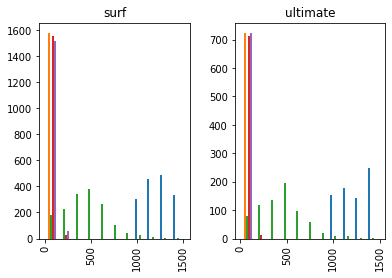

Average is 57.830733825445066
plan
surf        52.250906
ultimate    70.000000
Name: total_cost, dtype: float64
Centered around average


In [24]:
cluster_2_stat('total_cost')

Most users use the amount that was given (maybe less) and few use more than they should (perhaps moving to ultimate is much better for them).

In [25]:
surf = cluster_2.query('plan == "surf"')
ultimate = cluster_2.query('plan == "ultimate"')
sample0 = surf.total_cost
sample1 = ultimate.total_cost

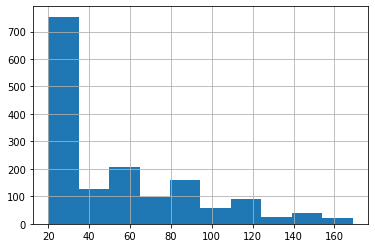

In [26]:
sample0.hist()
plt.show()

In [27]:
sample0.sum()


82504.18

In [28]:
sample1.sum()

50680.0

The distribution of surf users is quite astonishing, there are plenty of people who exeed their plan and pay exra (probably need to upgrad to the ultimate program).

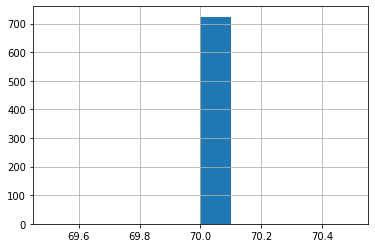

In [29]:
sample1.hist()
plt.show()

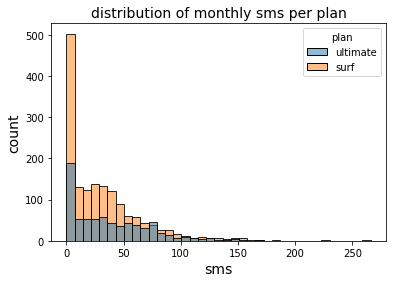

In [30]:
sns.histplot(cluster_2 ,x='messages',hue='plan')
plt.ylabel("count", size=14)
plt.xlabel("sms", size=14)
plt.title("distribution of monthly sms per plan", size=14)
plt.show()

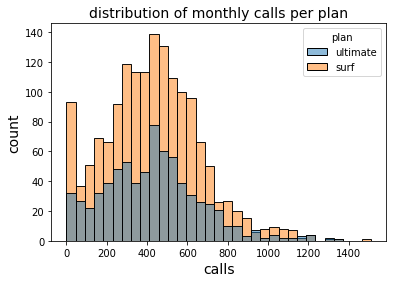

In [31]:
sns.histplot(cluster_2 ,x='duration',hue='plan')
plt.ylabel("count", size=14)
plt.xlabel("calls", size=14)
plt.title("distribution of monthly calls per plan", size=14)
plt.show()

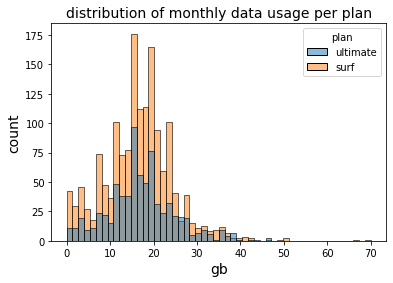

In [32]:
sns.histplot(cluster_2 ,x='gb_used',hue='plan')
plt.ylabel("count", size=14)
plt.xlabel("gb", size=14)
plt.title("distribution of monthly data usage per plan", size=14)
plt.show()

There seems to be a problem with my calculation, it's hard to believe each and every person in the ultimate program is kept within its boundaries.

In [33]:
p_value = stats.ttest_ind(sample0, sample1).pvalue

H0: As the assignment requires I need to test the total revenue from each plan. Average of sample 0 is not equel to average of sample 1.
    
H1: We don't have enough evidance to say that avrages of sample 0 and sample 1 are not the same.

In [34]:
p_value = p_value.astype(int)
alpha = 0.05
if p_value < alpha:
    print('Reject hypotheses: average of sample 0 is not equel to average of sample 1')
else:
    print("Fail to reject hypotheses: we don't have enough evidance to say that avrages of sample 0 and sample 1 \
    are not the same")

Reject hypotheses: average of sample 0 is not equel to average of sample 1


In [35]:
data_users

user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                         ...         ...       ...   
495  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-09-04      surf   
496               New Orleans-Metairie, LA MSA  2018-02-20      surf   
497     Los Angeles-Long Beach-Anaheim, CA MSA  2018-12-10  ultimate   
498  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-02-04      surf   
499          Orlando-Kissimmee-Sanford, FL MSA  2018-05-06      surf   

    churn_date  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
..         ...  
495        NaN  
496        NaN  
497        NaN  
498        NaN  
499        NaN  

[500 rows x 8 columns]

In [36]:
ny_nj_area = ['New York-Newark-Jersey City, NY-NJ-PA MSA',
              'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
             'Buffalo-Cheektowaga, NY MSA', 'Rochester, NY MSA']

Specified area for users is selected and gathered.

In [37]:
the_wanted_area = data_users.query('city == @ny_nj_area')
the_rest = data_users.query('city != @ny_nj_area')

In [38]:
sample2 = the_wanted_area['user_id'].reset_index()
sample3 = the_rest['user_id'].reset_index()

In [39]:
sample2_id = cluster_2.query('@cluster_2.user_id == @sample2')
sample3_id = cluster_2.query('@cluster_2.user_id == @sample3')
sample2_total = sample2_id.total_cost
sample3_total = sample3_id.total_cost

/home/jovyan/.local/lib/python3.7/site-packages/pandas/core/computation/ops.py:413: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return self.func(left, right)


Problem with this part unable to filter users by query.

In [40]:
p_value1 = stats.ttest_ind(sample2_total, sample3_total).pvalue

H0: As the assignment requires I need to test the total revenue from users in a certain location compared to the rest of the users. Average of sample 2 is not equel to average of sample 3.

H1: We don't have enough evidance to say that avrages of sample 2 and sample 3 are not the same.

In [41]:
p_value1 = p_value1.astype(int)
alpha = 0.05
if p_value1 <= alpha:
    print('Reject hypotheses: average of sample 2 is not equel to average of sample 3')
else:
    print("Fail to reject hypotheses: we don't have enough evidance to say that avrages of sample 2 and sample 3 \
    are not the same")

Reject hypotheses: average of sample 2 is not equel to average of sample 3


In [42]:
p_value1

-9223372036854775808

The 2 samples show that they are not equal so there is a difference in averages.

# Conclusion

After the investigation several outcomes have been revealed:

1. The surf users revenue is 82095.13 while the ultimate revenue is 50680.0 that is quite substantial in favor of the surf plan (that is without calculating how much the company is spending on each call, message and gb).

2. It's hard to say which group is more profitable (via location) there seems to be a problem with my query filter.

## Overall 

I suggest that in order to preserve the cliental the company should offer the surf users to move to the ultimate plan but no offer a downgrade to the ultimate users (they entered the plan in order to be a peacefull mind and knew about a cheaper plan but are 'wealthy' enough to be at the same plan regardless of use).